# Example of workflow
Here, we reproduce some results obtained in [This article](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004571). We start from the .zginml model that can be downloaded [here](https://doi.org/10.1371/journal.pcbi.1004571.s017) (SuppMat_models/SuppMat_Model_Master_Model.zginml)

In [1]:
import maboss
import ginsim
import pypint

You are using Pint version 2017-12-19 and pypint 1.3.93

### Loading the model in the api
Go to MaBoSS -> load network (zginml format). And replace the argument of the first function by the loaction of you .zginml file.

In [2]:
m = ginsim.open("Master_Model.zginml")
master_simulation = ginsim.to_maboss(m)

### Setting the simulation parameters
#### Setting initial states
To quickly modify the initial states of several nodes, you can use the widgets `wg_set_istate`. Go to MaBoSS -> network -> set istate.

In [ ]:
maboss.wg_set_istate(master_simulation.network)

In [4]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD')
istate = [1, 0]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [5]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta')
istate = [0.5, 0.5]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [6]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('miR200', 'miR203', 'miR34')
istate = [0, 1]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

#### Setting output
You can use the widget `wg_set_output` to set the output of the simulation (MaBoSS -> Simulation -> Set output).

In [7]:
#maboss.wg_set_output(master_simulation)
master_simulation.network.set_output(('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest'))

#### Setting other parameters
To modify other parameters of the simulation, you can use the method `update_parameters` of the simulation object.

In [8]:
master_simulation.update_parameters(discrete_time=0, use_physrandgen=0,
                                    seed_pseudorandom=100, sample_count=50000,
                                    max_time=50, time_tick=0.1, thread_count=4,
                                    statdist_traj_count=100, statdist_cluster_threshold=0.9)

## Runing simulation
Runing the simulation will create a `Result` object that holds the results of the simulation. You can quickly write the line below by going to MaBoSS -> Simulation -> run

In [9]:
master_results = master_simulation.run()

MaBoSS ended successfuly


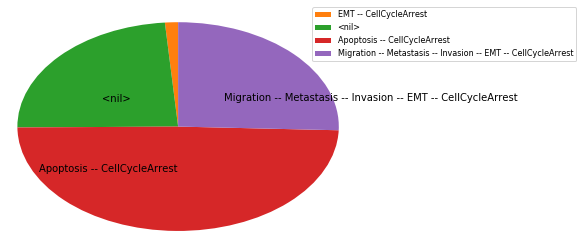

In [10]:
fig = master_results.plot_piechart()
fig

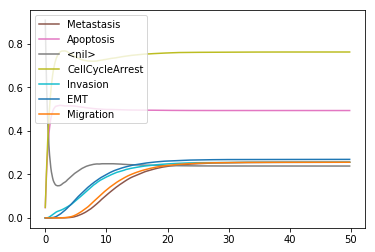

In [11]:
master_results.plot_node_trajectory()

In [12]:
model = pypint.load("/model/Master_Model.zginml")

Source file is in zginml format, importing with GINsim

Simplifying model...

/notebook/pyMaBoSS/gen/colomotopac2609fMaster_Model.an

1 state(s) have been registered: initState_1

In [13]:
maboss.widgets.network.wg_transfer_istate(master_simulation.network, model)

{'ECMicroenv': (0, 1), 'DNAdamage': (0, 1), 'GF': (0, 1), 'TGFbeta': (0, 1), 'Metastasis': 0, 'Migration': 0, 'Invasion': 0, 'EMT': 0, 'Apoptosis': 0, 'CellCycleArrest': 0, 'p21': 0, 'CDH1': 0, 'CDH2': 0, 'VIM': 0, 'TWIST1': 0, 'SNAI1': 0, 'SNAI2': 0, 'ZEB1': 0, 'ZEB2': 0, 'AKT1': 0, 'DKK1': 0, 'CTNNB1': 0, 'NICD': 0, 'p63': 0, 'p53': 0, 'p73': 0, 'miR200': 1, 'miR203': 1, 'miR34': 1, 'AKT2': 0, 'ERK': 0, 'SMAD': 0}


In [14]:
model.oneshot_mutations_for_cut(Metastasis=1, exclude={"DNAdamage", "ECMicroenv"})

This computation is an *under-approximation*: returned mutations are all valid, but they may be non-minimal, and some solutions may be missed.

Limiting solutions to mutations of at most 5 automata. Use `maxsize` argument to change.

[{'Migration': 0},
 {'Invasion': 0},
 {'EMT': 0},
 {'CDH1': 1},
 {'CDH2': 0},
 {'VIM': 0},
 {'TWIST1': 0},
 {'AKT1': 1},
 {'p63': 1},
 {'p53': 1},
 {'p73': 1},
 {'miR200': 1},
 {'miR203': 1},
 {'miR34': 1},
 {'AKT2': 0},
 {'ERK': 0},
 {'CDH2': 1, 'TGFbeta': 0},
 {'DKK1': 1, 'TGFbeta': 0},
 {'CTNNB1': 0, 'TGFbeta': 0},
 {'CDH2': 1, 'ZEB2': 0},
 {'CDH2': 1, 'NICD': 0},
 {'CDH2': 1, 'SMAD': 0},
 {'DKK1': 1, 'ZEB2': 0},
 {'CTNNB1': 0, 'ZEB2': 0},
 {'DKK1': 1, 'NICD': 0},
 {'DKK1': 1, 'SMAD': 0},
 {'CTNNB1': 0, 'NICD': 0},
 {'CTNNB1': 0, 'SMAD': 0}]

In [15]:
master_results.get_fptable()

,FP,Proba,State,ECMicroenv,DNAdamage,GF,CDH1,CDH2,CTNNB1,NICD,...,miR34,Apoptosis,p21,miR203,CellCycleArrest,TWIST1,SNAI1,SNAI2,ZEB1,DKK1
0,#1,0.11598,ECMicroenv -- DNAdamage -- CDH1 -- TGFbeta -- ...,1,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,#2,0.12786,ECMicroenv -- DNAdamage -- CDH1 -- TGFbeta -- ...,1,1,0,1,0,0,0,...,0,1,1,1,1,0,0,0,0,0
2,#3,0.01130,GF -- CDH2 -- EMT -- VIM -- AKT2 -- ERK -- ZEB...,0,0,1,0,1,0,0,...,0,0,0,0,1,1,1,1,1,0
3,#4,0.23820,CDH1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,#5,0.24892,ECMicroenv -- GF -- CDH2 -- NICD -- TGFbeta --...,1,0,1,0,1,0,1,...,0,0,0,0,1,1,1,1,1,1
5,#6,0.12216,DNAdamage -- CDH1 -- p63 -- miR200 -- p73 -- A...,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
6,#7,0.00666,ECMicroenv -- DNAdamage -- GF -- CDH2 -- NICD ...,1,1,1,0,1,0,1,...,0,0,0,0,1,1,1,1,1,1
7,#8,0.12704,DNAdamage -- CDH1 -- miR200 -- p53 -- Apoptosi...,0,1,0,1,0,0,0,...,0,1,1,1,1,0,0,0,0,0
8,#9,0.00184,DNAdamage -- GF -- CDH2 -- EMT -- VIM -- AKT2 ...,0,1,1,0,1,0,0,...,0,0,0,0,1,1,1,1,1,0


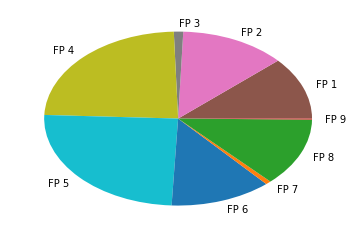

In [16]:
master_results.plot_fixpoint()

In [17]:
netw = master_simulation.network

In [18]:
netw['p53'].rt_up

'@logic ? $u_p53 : 0'

In [19]:
master_simulation.param['$u_p53']

1.0

In [20]:
master_results.get_nodes_probtraj()

,Metastasis,Apoptosis,<nil>,CellCycleArrest,Invasion,EMT,Migration
0.0,0.000000,0.046845,0.907612,0.048581,0.000000,0.000000,0.000000
0.1,0.000000,0.131078,0.748105,0.139491,0.000030,0.000000,0.000000
0.2,0.000000,0.201728,0.622698,0.220349,0.000247,0.000000,0.000000
0.3,0.000000,0.261054,0.523273,0.292608,0.000619,0.000000,0.000000
0.4,0.000000,0.311036,0.443549,0.357103,0.001148,0.000000,0.000000
0.5,0.000000,0.352008,0.380005,0.413226,0.001968,0.000020,0.000000
0.6,0.000000,0.386774,0.328627,0.464493,0.003236,0.000056,0.000000
0.7,0.000000,0.414999,0.288637,0.509117,0.004916,0.000177,0.000000
0.8,0.000000,0.437193,0.257681,0.546387,0.006893,0.000329,0.000000
0.9,0.000000,0.454896,0.231571,0.579754,0.008983,0.000535,0.000000


In [21]:
master_results.get_states_probtraj()

,Metastasis,EMT -- Apoptosis -- CellCycleArrest,Metastasis -- EMT,Migration -- Invasion,Invasion -- EMT -- Apoptosis -- CellCycleArrest,Metastasis -- Invasion -- EMT -- CellCycleArrest,Invasion,Invasion -- EMT -- Apoptosis,EMT,Metastasis -- Invasion -- EMT,...,Apoptosis,Invasion -- Apoptosis -- CellCycleArrest,Metastasis -- Invasion -- CellCycleArrest,CellCycleArrest,Migration -- Metastasis -- Invasion,Migration -- EMT,Metastasis -- EMT -- CellCycleArrest,Metastasis -- CellCycleArrest,Migration,Migration -- Invasion -- CellCycleArrest
0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.043806,0.000000,0.0,0.045542,0.0,0.000000,0.000000,0.0,0.0,0.0
0.1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000016,0.000000,0.000000,0.000000,...,0.112385,0.000000,0.0,0.120792,0.0,0.000000,0.000000,0.0,0.0,0.0
0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000145,0.000000,0.000000,0.000000,...,0.156762,0.000012,0.0,0.175385,0.0,0.000000,0.000000,0.0,0.0,0.0
0.3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000365,0.000000,0.000000,0.000000,...,0.183679,0.000042,0.0,0.215171,0.0,0.000000,0.000000,0.0,0.0,0.0
0.4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000673,0.000000,0.000000,0.000000,...,0.198568,0.000089,0.0,0.244463,0.0,0.000000,0.000000,0.0,0.0,0.0
0.5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.001069,0.000000,0.000020,0.000000,...,0.205443,0.000145,0.0,0.266381,0.0,0.000000,0.000000,0.0,0.0,0.0
0.6,0.0,0.000013,0.0,0.0,0.000000,0.0,0.001672,0.000000,0.000035,0.000000,...,0.204838,0.000291,0.0,0.281949,0.0,0.000000,0.000000,0.0,0.0,0.0
0.7,0.0,0.000040,0.0,0.0,0.000000,0.0,0.002333,0.000000,0.000073,0.000000,...,0.199325,0.000551,0.0,0.292395,0.0,0.000000,0.000000,0.0,0.0,0.0
0.8,0.0,0.000040,0.0,0.0,0.000011,0.0,0.003231,0.000000,0.000159,0.000000,...,0.191764,0.000798,0.0,0.299566,0.0,0.000000,0.000000,0.0,0.0,0.0
0.9,0.0,0.000042,0.0,0.0,0.000024,0.0,0.004292,0.000000,0.000156,0.000000,...,0.183122,0.000916,0.0,0.306174,0.0,0.000000,0.000000,0.0,0.0,0.0


In [22]:
#maboss.wg_make_mutant(master_simulation)
genes = ('p53',)
p53_down_simulation = master_simulation.copy()
for gene in genes:
    p53_down_simulation.mutate(gene, "OFF")

In [23]:
#p53_results = p53_down_simulation.run()

In [30]:
print(p53_down_simulation.network['p53'])

Node p53 {

	logic = (!DNAdamage & !SNAI2 & !AKT1 & !CTNNB1 & !NICD & !p73 & miR34 & !AKT2) | (!DNAdamage & !SNAI2 & !AKT1 & !CTNNB1 & NICD & !p73 & !AKT2) | (!DNAdamage & !SNAI2 & !AKT1 & CTNNB1 & !p73 & !AKT2) | (DNAdamage & !SNAI2 & !AKT1 & !p73 & !AKT2);
	rate_up = $Low_p53 ? 0 : ($High_p53 ? 1E100 : (@logic ? $u_p53 : 0));
	rate_down = $High_p53 ? 0 : ($Low_p53 ? 1E100 : (@logic ? 0 : $d_p53));
}


In [26]:
new_sim = master_simulation.copy_results(master_results)

In [27]:
new_results = new_sim.run()

MaBoSS ended successfuly


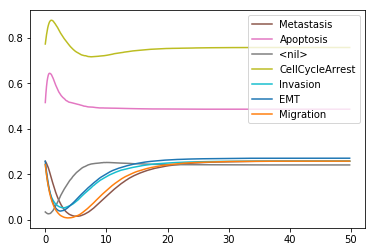

In [28]:
new_results.plot_node_trajectory()